In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [304]:
import warnings
warnings.filterwarnings('ignore')

In [305]:
cars = pd.read_csv('E:\MRM\Research_Task_5\CarPrice_Assignment.csv')

In [306]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Feature Engineering 

## Significant Features

In [307]:
cars_new = cars

In [308]:
cars_new = cars.drop(['car_ID','symboling','CarName',],axis = 'columns')
cars_new.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Adding New Features (weighted average of city and highway fuel economy)

In [309]:
cars_new['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])

## One Hot Encoding (Converting discrete data into numerical values)

### 1. Creating dummy variable columns 
### 2. Merging Cars dataframe and dummies
### 3. Dropping the original column and one of the dummy variable column (or will create dummy variable trap)

In [310]:
cars['drivewheel'].value_counts()
dummies = pd.get_dummies(cars.drivewheel,dtype=int)
dummies

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0
...,...,...,...
200,0,0,1
201,0,0,1
202,0,0,1
203,0,0,1


In [311]:
merged = pd.concat([cars_new,dummies],axis='columns')
merged.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,4wd,fwd,rwd
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70,0,0,1
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70,0,0,1
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15,0,0,1
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70,0,1,0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80,1,0,0


In [312]:
final = merged.drop(['drivewheel','rwd'],axis='columns')
final.head()

,fueltype,aspiration,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,4wd,fwd
0,gas,std,two,convertible,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70,0,0
1,gas,std,two,convertible,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70,0,0
2,gas,std,two,hatchback,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15,0,0
3,gas,std,four,sedan,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70,0,1
4,gas,std,four,sedan,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80,1,0


## Bringing Price Column to first position

In [313]:
first_column = final.pop('price') 
final.insert(0, 'price', first_column)
final.head()

,price,fueltype,aspiration,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueleconomy,4wd,fwd
0,13495.0,gas,std,two,convertible,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,23.70,0,0
1,16500.0,gas,std,two,convertible,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,23.70,0,0
2,16500.0,gas,std,two,hatchback,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,22.15,0,0
3,13950.0,gas,std,four,sedan,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,26.70,0,1
4,17450.0,gas,std,four,sedan,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,19.80,1,0


## Performing One hot encoding for required columns

In [314]:
def encode_and_concat(df, columns_to_encode):
    for column in columns_to_encode:
        dummies = pd.get_dummies(df[column], dtype=int, prefix=column)
        df = pd.concat([df, dummies], axis='columns')
        df = df.drop([column, dummies.columns[0]], axis='columns')
    return df

columns_to_encode = [
    'fueltype',
    'aspiration',
    'doornumber',
    'carbody',
    'enginelocation',
    'enginetype',
    'cylindernumber',
    'fuelsystem'
]

cars_encoded = encode_and_concat(final, columns_to_encode)
cars_encoded.head()

,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueleconomy,4wd,fwd,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,13495.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,23.70,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,16500.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,23.70,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,16500.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,22.15,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,13950.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,26.70,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,17450.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,19.80,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


# Feature Scaling (Z score Normalization)

In [315]:
Y = cars_encoded.price
X = cars_encoded.drop(['price'], axis='columns')

In [316]:
# Standardization for X
X_mean = X.mean()
X_std = X.std()
X_standardized = (X - X_mean) / X_std

# Standardization for Y
Y_mean = Y.mean()
Y_std = Y.std()
Y_standardized = (Y - Y_mean) / Y_std

# Check the shape of X_standardized and Y_normalized
print("Shape of X_standarized:", X_standardized.shape)
print("Shape of Y_standarized:", Y_standardized.shape)

Shape of X_standarized: (205, 43)
Shape of Y_standarized: (205,)


# Regression Model

In [317]:
def model(X, Y, learning_rate, iteration):
    theta = np.zeros((X.shape[1], 1))
    Y = np.array(Y).reshape(-1, 1)
    X = np.array(X)
    m = Y.size
    cost_list = []
    for i in range(iteration):
        y_pred = np.dot(X, theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred - Y)) # Mean Squared Error Cost Function 
        d_theta = (1/m)*np.dot(X.T, y_pred - Y)
        theta = theta - learning_rate*d_theta
        cost_list.append(cost)

        if(i%(iteration/10) == 0):
            print("Cost at iteration", i, "is:", cost)
    return theta, cost_list

In [318]:
iteration = 1000
learning_rate = 0.1
theta, cost_list = model(X_standardized, Y_standardized, learning_rate, iteration)

Cost at iteration 0 is: 0.497560975609756
Cost at iteration 100 is: 0.037247203678443426
Cost at iteration 200 is: 0.03277041054324299
Cost at iteration 300 is: 0.03154541342305812
Cost at iteration 400 is: 0.031058121098999535
Cost at iteration 500 is: 0.030804355854488423
Cost at iteration 600 is: 0.030648288949237067
Cost at iteration 700 is: 0.03054265688218982
Cost at iteration 800 is: 0.030466745366299584
Cost at iteration 900 is: 0.030409835086068288


# Cost function vs Iterations Graph

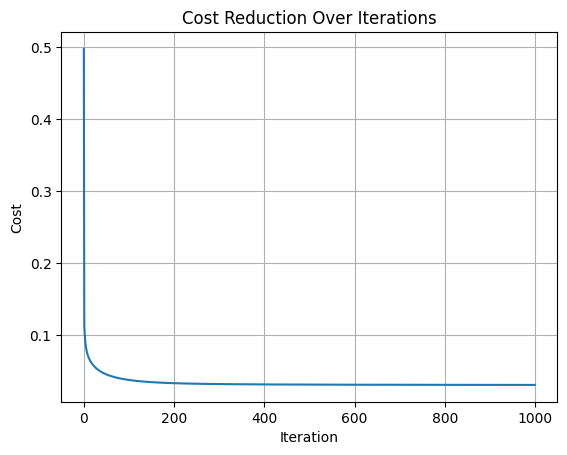

In [319]:
plt.plot(cost_list)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Reduction Over Iterations')
plt.grid()
plt.show()

# Linear Regression Graph

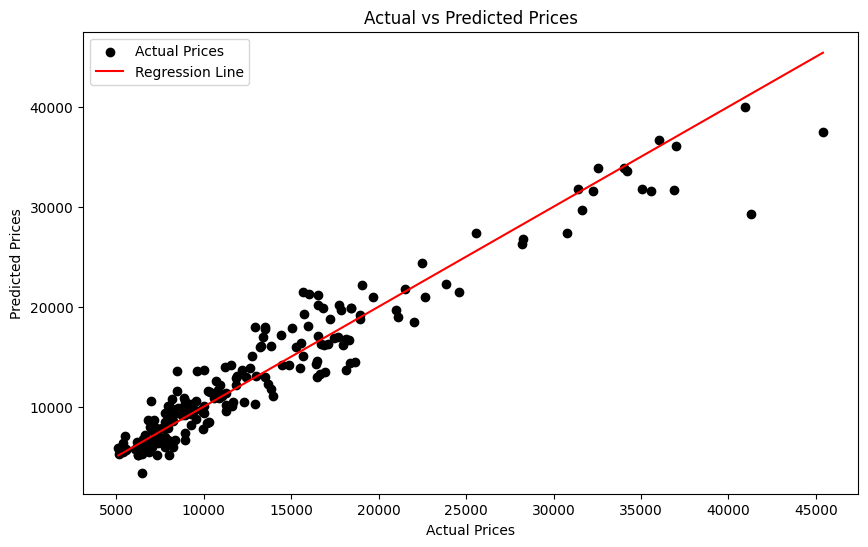

In [320]:
plt.figure(figsize=(10, 6))
plt.scatter(Y.values, y_pred, color='black', label='Actual Prices')
# Adding regression line
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linestyle='-', label='Regression Line') 

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()

plt.show()

# R2 Score

In [321]:
y_pred_series = pd.Series(y_pred.ravel())
def R2_score(y_actual, y_pred):
    ss_tot=np.sum((y_actual-np.mean(y_actual))**2)
    ss_res=np.sum((y_actual-y_pred)**2)
    return (1-ss_res/ss_tot)
r2 = R2_score(Y,y_pred_series)
print(f"R-squared score is {(r2*100)}%")

R-squared score is 92.49859918611095%
